# Expert Chase

See the co-located [`README.md`](README.md) for more information.

### Table of Contents

- [1. Dataset: Load and First Exposure](#1.-Dataset:-Load-and-First-Exposure)
    - [1.1 First Exposure: Conclusions, Notes and Next Steps](#1.1-First-Exposure:-Conclusions,-Notes-and-Next-Steps)

## 1. Dataset: Load and First Exposure

Prior to any data analysis and modeling, we need to load and understand the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_Nov_2022.csv')

In [3]:
df.shape

(371804, 7)

In [17]:
df.tail()

,person-id,timestamp,search-id,search-ranking,countries,email-domains,outreach-success
371799,1fdc9fe9-b2bf-49fd-a205-5182eb8a2816,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,996,US,"unc.edu,med.unc.edu",0
371800,a150e234-1452-4211-b6c3-efd1c6003056,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,997,US,msx.upmc.edu,0
371801,668dd801-9b5d-4969-a2c5-9e694bdcc006,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,998,US,omrf.org,0
371802,57900bb4-fb62-4a07-949b-b4f27d04e8b9,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,999,US,hss.edu,0
371803,466185f8-54a0-473a-bde5-6a8692f1b4fb,2021-05-18T11:17:37.625000,f18d6829-5eb8-4df1-bd56-40a383f2a5d8,1000,US,hss.edu,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371804 entries, 0 to 371803
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person-id         371804 non-null  object
 1   timestamp         371804 non-null  object
 2   search-id         371804 non-null  object
 3   search-ranking    371804 non-null  int64 
 4   countries         371794 non-null  object
 5   email-domains     371793 non-null  object
 6   outreach-success  371804 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 19.9+ MB


In [6]:
# Number of NAs due to values in countries and email-domains
df.isna().sum(axis=1).replace({2:1}).sum(axis=0)

11

In [7]:
# Unique country values: we need to split them, also there are NaNs
df.countries.unique()

array(['US', 'None', nan, 'IT,US', 'US,TW', 'US,FR', 'US,IO', 'US,IL',
       'GB,US', 'US,SG', 'CA,US', 'GR,US', 'CH,US', 'US,BR', 'LB,US',
       'DE,US', 'ET,US', 'PH,US', 'NZ,US', 'RS,US', 'IE,US', 'NE,US',
       'SY,US', 'US,UA', 'US,PR', 'DE', 'US,AU', 'AR,US', 'US,TR',
       'US,MY', 'PK,US,GU', 'US,GY', 'US,DE', 'US,RS', 'US,PL', 'US,JP',
       'US,GB', 'AU,US', 'MX,US', 'US,LB', 'EG,US', 'US,CO', 'US,AE',
       'US,VE', 'US,FI', 'US,IT', 'TW,US', 'US,JE', 'US,ES', 'US,SE',
       'US,HK', 'CN,US', 'US,IR', 'LT,US', 'US,BD', 'PS,US', 'DK,US',
       'US,KR', 'US,LR', 'PK,US', 'NL,US', 'CA', 'US,CA', 'GB,ES', 'ES',
       'IT', 'FR', 'FR,DE,GB,IT', 'FR,ES', 'GB,IT', 'FR,DE', 'GB',
       'DE,ES', 'DE,GB', 'DE,IT', 'IT,ES', 'FR,GB', 'GB,IT,ES', 'FR,IT',
       'DE,AT', 'US,CH', 'US,NO', 'US,BO', 'BE,US', 'AE,US', 'US,PF',
       'US,SA', 'US,EG', 'US,PH', 'US,VN', 'US,PA', 'US,NE', 'US,ZA',
       'US,ID', 'US,LT', 'US,HN', 'US,DK', 'IO,US', 'US,PT', 'BR',
       'BR,US', 'BR

<AxesSubplot: ylabel='Frequency'>

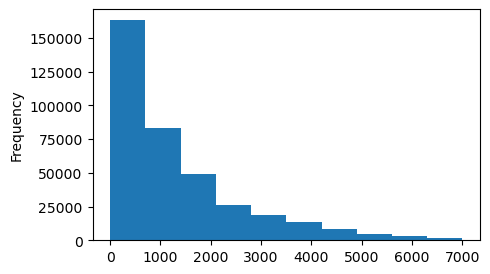

In [24]:
# Ranking histogram
df['search-ranking'].plot(kind='hist', figsize=(5,3))

In [25]:
# We have 371804 entries, but only 284 unique search-ids
len(df['search-id'].unique())

284

In [27]:
# Each search has a number of ranking results, probably manually defined
# The following list shows how many times each number of ranking results appears
# E.g., a ranking list of length 1000 was the most common and appears in 70 searches
# a ranking list of length 250 is the least common and appears in 1 search
df.groupby('search-id')['search-ranking'].max().value_counts()

1000    70
500     44
2000    35
300     25
800     19
4000    11
3000    10
1500    10
100      8
200      8
5000     6
600      5
900      5
2500     5
50       5
6000     4
1        4
400      4
7000     2
1400     1
3500     1
700      1
250      1
Name: search-ranking, dtype: int64

In [28]:
# Unique email domains: as with countries, we need to split them 
len(df['email-domains'].unique())

43542

In [29]:
# We have 371804 entries, but only 167109 unique person-ids
len(df['person-id'].unique())

167108

In [30]:
# We have 284 timestamps
len(df['timestamp'].unique())

284

In [31]:
# Each timestamp is related to a search-id
df.groupby('search-id')['timestamp'].nunique().sum()

284

In [32]:
# Outreach success rate: 0.4%
success = df['outreach-success'].value_counts()
print(success)
print(f"\nOutreach-success ratio: {success[1]/df.shape[0]}")

0    370259
1      1534
Name: outreach-success, dtype: int64

Outreach-success ratio: 0.004125951806515991


### 1.1 First Exposure: Conclusions, Notes and Next Steps

- Countries and emails have NAs, 11 entries are affected.
- We have 371804 entries, but only 167109 unique person-ids.
- We have 371804 entries, but only 284 unique search-ids, which have their own timestamp; the search-id could be probably dropped, since the timestamp might contain its category information and additional time information (month, etc.).
- Search outcome/ranking lenths vary from 1 to 7000; a ranking length 1000 is the most common, 250 the least common. 
- The current outreach-success rate is 0.4%; the dataset is very imbalanced.

Questions:

- How is ranking determined?
- Could we get more information about expert candidates? E.g., years of experience, number of companies they've worked in, whether they've done conosulting or not, etc.
- Are there candidates who don't respond in the initial contact(s) (outreach-success 0), but they end up responding? Which are their features? I can imagine there's a technical term for those candidates...

Next Steps:

- Drop NAs.
- Countries and emails need to be split into categories; seems easy, because text appears to be quite clean.
- Process timestamp.

Extra points:

- Maybe the number of countries/emails a person has is relevant (feature engineering).

## 2. Data Preprocessing and Cleaning

In [33]:
df_org = df.copy()

In [35]:
# We can safely remove the NAs, because they affect to only 11 entries
# and they appear in the features that I assume to be most predictive: country and email-domain
df = df.dropna()

In [36]:
# New number of entries: 371793
df.shape

(371793, 7)

In [ ]:
# Countries
